In [53]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
import minisom
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from random import randint, choice
import LVQ

In [54]:
data = pd.read_csv(r"../data/SD-2X_rocktype.csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y [y==4] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [55]:
epsilon = 0.9
epsilon_dec_factor = 0.001

In [56]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

In [57]:
labels = np.zeros((4, 10, 10))

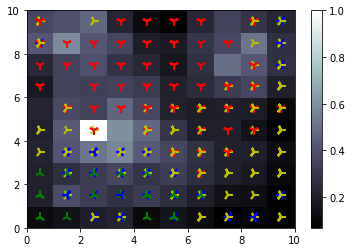

In [58]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som1.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som1.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [59]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]]/tmp[sort[2]] < 5):
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [60]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som1.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.21531898 0.3896063  0.2765484  0.55770246 0.18733963 0.6158226 ]
1 	 [0.17920295 0.35294064 0.31305959 0.53588877 0.11099398 0.66769488]
1 	 [0.23489217 0.36474646 0.38386029 0.51534184 0.15949753 0.61108125]
3 	 [0.30938884 0.36703536 0.44656212 0.54403349 0.29356981 0.43357836]
3 	 [0.33149434 0.38364736 0.48301357 0.52182126 0.32583825 0.36215481]
3 	 [0.40380504 0.32166823 0.5217529  0.44414821 0.44336203 0.25962941]
0 	 [0.42285459 0.27267603 0.65064472 0.39659495 0.37494403 0.16010196]
0 	 [0.35402498 0.34427384 0.63945557 0.43270166 0.35496926 0.1844031 ]
3 	 [0.22765725 0.2629033  0.73023585 0.40864895 0.20013074 0.37250954]
0 	 [0.07399177 0.1068217  0.92753166 0.18965807 0.09357072 0.27941672]
1 	 [0.22812262 0.40170975 0.34681989 0.52955635 0.19949103 0.58828454]
2 	 [0.20815394 0.34212285 0.48492485 0.47893947 0.1355017  0.59726716]
1 	 [0.27335641 0.3893366  0.38413562 0.53949583 0.19299488 0.54573833]
2 	 [0.30576313 0.39301977

In [61]:
lvq1 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq1.fit(x_train, y_train)

In [62]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97       138
          1       0.93      0.93      0.93        55
          2       0.76      0.46      0.58        28
          3       0.83      0.95      0.89       108

avg / total       0.91      0.91      0.90       329



In [63]:
data_new = pd.read_csv(r"../data/SD-3X_rocktype.csv")
x_new = data.iloc[:, 0:6].values
y_new = data.iloc[:, 6].values
y_new[y_new == 4] = 0
x_new = minmax.fit_transform(x_new)
predicted_y_new = [lvq1.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y_new, target_names=['0', '1', '2', '3']))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       558
          1       0.90      0.95      0.93       165
          2       0.75      0.37      0.50       139
          3       0.80      0.95      0.87       453

avg / total       0.88      0.88      0.88      1315



In [64]:
# Training the SOM
from minisom import MiniSom
som2 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 100)

In [65]:
labels = np.zeros((4, 10, 10))

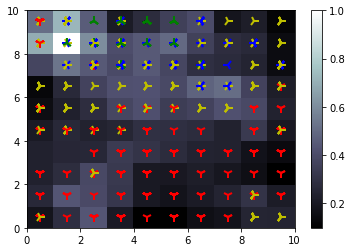

In [66]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som2.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som2.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [67]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]]/tmp[sort[2]] < 5):
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [68]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som2.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

0 	 [0.35211269 0.40170112 0.46002356 0.5406992  0.38950197 0.24282457]
0 	 [0.37001035 0.44653087 0.30094931 0.52167163 0.48723106 0.25218374]
0 	 [0.37660305 0.38464106 0.28989104 0.55604218 0.48865471 0.27967526]
3 	 [0.41041971 0.36674801 0.43580274 0.49571849 0.43318914 0.27154717]
0 	 [0.38048005 0.4338644  0.32458865 0.55394703 0.41904919 0.28138814]
3 	 [0.33212269 0.45336854 0.23662651 0.58761098 0.3635719  0.38818578]
3 	 [0.32924377 0.46292519 0.26888517 0.58463846 0.33897649 0.38508751]
3 	 [0.29738639 0.44040639 0.33971294 0.58383004 0.25625697 0.44234998]
0 	 [0.19763707 0.27605298 0.76608644 0.38494188 0.17443804 0.34530715]
0 	 [0.09261158 0.136295   0.9377501  0.18739213 0.07718374 0.2289069 ]
0 	 [0.38467782 0.37004301 0.49448991 0.44884337 0.48643812 0.18024557]
0 	 [0.39983193 0.39426419 0.41423858 0.48262359 0.49572986 0.1855342 ]
0 	 [0.38621095 0.40297519 0.35879469 0.51270771 0.49050722 0.23717491]
3 	 [0.39752671 0.39306252

In [69]:
lvq2 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq2.fit(x_train, y_train)

In [70]:
predicted_y2 = [lvq2.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y2, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       1.00      0.88      0.93       558
          1       0.76      0.97      0.85       165
          2       0.90      0.19      0.31       139
          3       0.76      0.98      0.86       453

avg / total       0.88      0.85      0.83      1315



In [71]:
# Training the SOM
from minisom import MiniSom
som3 = MiniSom(x = 10, y = 10, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 100)

In [72]:
labels = np.zeros((4, 10, 10))

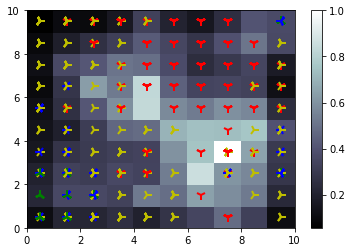

In [73]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som3.distance_map().T)
colorbar()
markers = ['1', '2', '3', '4', 's', '8', 'p', '>']
colors = ['r', 'g', 'b', 'y', 'w', 'c', 'm', 'k']
for i, x in enumerate(x_train):
    w = som3.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y_train[i]],
         markeredgecolor = colors[y_train[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
    if y_train[i] == 0:
        labels[0, w[0], w[1]] += 1
    elif y_train[i] == 1:
        labels[1, w[0], w[1]] += 1
    elif y_train[i] == 2:
        labels[2, w[0], w[1]] += 1
    elif y_train[i] == 3:
        labels[3, w[0], w[1]] += 1
show()

In [74]:
taggings = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        tmp = np.array([labels[0][i][j], labels[1][i][j], labels[2][i][j], labels[3][i][j]])
        sort = tmp.argsort()
        if (tmp[sort[3]]/tmp[sort[2]] < 5):
            taggings[i][j] = np.random.choice([sort[3], sort[2]])
        else:
            taggings[i][j] = sort[3]

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [75]:
taggings

array([[1., 1., 1., 3., 3., 3., 3., 3., 3., 3.],
       [1., 2., 2., 2., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 0., 3.],
       [3., 3., 3., 3., 3., 3., 3., 0., 3., 0.],
       [3., 3., 3., 0., 3., 3., 0., 0., 0., 3.],
       [3., 3., 3., 3., 3., 0., 0., 0., 0., 0.],
       [3., 0., 3., 0., 3., 0., 0., 0., 0., 0.],
       [0., 3., 3., 0., 0., 0., 0., 0., 0., 0.],
       [3., 3., 3., 3., 3., 0., 3., 0., 0., 3.],
       [3., 3., 3., 2., 2., 3., 3., 3., 3., 2.]])

In [76]:
p_vectors = []
for i in range(10):
    for j in range(10):
        if(taggings[i][j] == 0):
            p = LVQ.prototype(0, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 1):
            p = LVQ.prototype(1, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 2):
            p = LVQ.prototype(2, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
        elif(taggings[i][j] == 3):
            p = LVQ.prototype(3, som3.weights[(i,j)], epsilon)
            p_vectors.append(p)
print("class id \t Initial prototype vector \n")
for p_v in p_vectors:
    print(p_v.class_id, '\t', p_v.p_vector)

class id 	 Initial prototype vector 

1 	 [0.18019602 0.38640493 0.13117531 0.59464901 0.10223202 0.66102559]
1 	 [0.20513409 0.41092473 0.19363028 0.58543266 0.11698398 0.6286108 ]
1 	 [0.28201399 0.41258732 0.30721367 0.58857163 0.19015924 0.52276427]
3 	 [0.31813154 0.4225168  0.32769045 0.5975625  0.24063948 0.44486238]
3 	 [0.34913849 0.45553939 0.34352944 0.59997283 0.27164887 0.34469291]
3 	 [0.33892393 0.49230902 0.3016126  0.59870262 0.23254292 0.37319058]
3 	 [0.33633003 0.49423089 0.30626354 0.58024242 0.28517842 0.36168022]
3 	 [0.34448488 0.47451544 0.37453649 0.54499189 0.31616974 0.34483071]
3 	 [0.37344427 0.47237044 0.3353346  0.55836168 0.32027636 0.33258313]
3 	 [0.3952507  0.4576091  0.3504261  0.56563338 0.30129986 0.3175683 ]
1 	 [0.2180749  0.43184708 0.13771975 0.59375302 0.13695534 0.61293172]
2 	 [0.25789539 0.45070474 0.19998987 0.58686718 0.1508846  0.56848923]
2 	 [0.30140534 0.41286897 0.31712713 0.5856335  0.19223887 0.50813585]
2 	 [0.33715008 0.39988576

In [77]:
lvq3 = LVQ.LVQ(x_train, y_train, n_classes=2, n_neurons=25, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq3.fit(x_train, y_train)

In [78]:
predicted_y3 = [lvq3.predict(instance) for instance in x_new]

from sklearn.metrics import classification_report

print (classification_report(y_new, predicted_y3, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       1.00      0.90      0.95       558
          1       0.80      0.90      0.85       165
          2       0.61      0.35      0.45       139
          3       0.79      0.95      0.86       453

avg / total       0.86      0.86      0.85      1315



In [79]:
ensemble = [np.asarray(predicted_y_new), np.asarray(predicted_y2), np.asarray(predicted_y3)]

In [80]:
len(ensemble[0])

1315

In [81]:
predict = [np.bincount([ensemble[j][i] for j in range(3)]).argmax() for i in range(len(ensemble[1]))]

In [82]:
print (classification_report(y_new, predict, target_names=['0','1', '2', '3']))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96       558
          1       0.85      0.96      0.91       165
          2       0.82      0.33      0.47       139
          3       0.80      0.98      0.88       453

avg / total       0.89      0.88      0.87      1315



In [83]:
for i in range(0,4):
    print("# of " + str(i) +  ": ", len(y_train[y_train==i]))

# of 0:  420
# of 1:  110
# of 2:  111
# of 3:  345
